# Tarea 5 - Introducción a la Biomecánica
### Pregunta 2

In [1]:
import scipy.integrate as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Graphs
naranjo = '#F59A23'     
azul = '#010589'
rojo = '#E40C2B'
verde = '#00D300'
grosor = 2.5
fig_size = (8, 5)

#### Ítem I

In [3]:
# Parameters
global C_rs, R_aw, P_peep, P_peak, IT, RR
C_rs = 0.5
R_aw = 2
P_peep = 5
P_peak = 10
IT = 3
RR = 10 / 60

In [4]:
# Square wave
def p_mv(t):
    if t % (1 / RR) < IT:
        return P_peak
    return P_peep

In [5]:
def v_dot(v, t):
    return (p_mv(t) - P_peep - v / C_rs) / R_aw

In [6]:
t = np.linspace(0, 5 / RR , 1000)
v_0 = 0
v_sol = sp.odeint(v_dot, v_0, t)

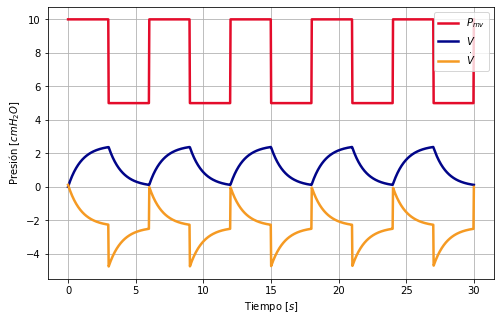

In [7]:
plt.figure(figsize=fig_size)
plt.plot(
    t, [p_mv(t[i]) for i in range(len(t))],
    label=r'$P_{mv}$',
    linewidth=grosor,
    color=rojo
)
plt.plot(
    t, v_sol,
    label=r'$V$',
    linewidth=grosor,
    color=azul
)
plt.plot(
    t, [v_dot(v_sol[i], t[i]) for i in range(len(t))] - max(v_sol),
    label=r'$\dot{V}$',
    linewidth=grosor,
    color=naranjo
)
plt.xlabel(r'Tiempo $[s]$')
plt.ylabel(r'Presión $[cmH_2O]$')
plt.legend()
plt.grid()
plt.show()

#### Ítem II

In [8]:
# Parameters
global C_rs_a, R_aw_a, P_peep_a, P_peak_a, IT_a, RR_a
global C_rs_c, R_aw_c, P_peep_c, P_peak_c, IT_c, RR_c

C_rs_a = 0.35
R_aw_a = 1.2
P_peep_a = 5
P_peak_a = 10
IT_a = 3
RR_a = 10 / 60

C_rs_c = 0.65
R_aw_c = 2.5
P_peep_c = 5
P_peak_c = 10
IT_c = 3
RR_c = 10 / 60

In [9]:
# Square wave
def p_mv_a(t):
    if t % (1 / RR_a) < IT_a:
        return P_peak_a
    return P_peep_a

def p_mv_c(t):
    if t % (1 / RR_c) < IT_c:
        return P_peak_c
    return P_peep_c

In [10]:
def v_dot_a(v, t):
    return (p_mv_a(t) - P_peep_a - v / C_rs_a) / R_aw_a

def v_dot_c(v, t):
    return (p_mv_c(t) - P_peep_c - v / C_rs_c) / R_aw_c

In [11]:
t_a = np.linspace(0, 5 / RR_a , 1000)
v_0_a = 0
v_sol_a = sp.odeint(v_dot_a, v_0_a, t_a)

t_c = np.linspace(0, 5 / RR_c , 1000)
v_0_c = 0
v_sol_c = sp.odeint(v_dot_c, v_0_c, t_c)

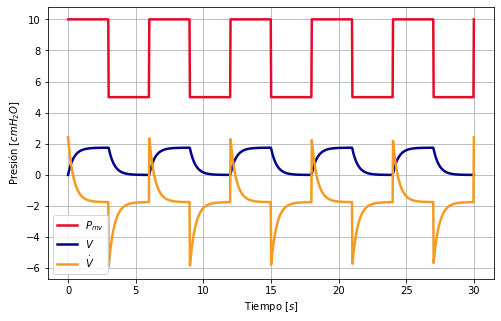

In [12]:
plt.figure(figsize=fig_size)
plt.plot(
    t_a, [p_mv_a(t_a[i]) for i in range(len(t_a))],
    label=r'$P_{mv}$',
    linewidth=grosor,
    color=rojo
)
plt.plot(
    t_a, v_sol_a,
    label=r'$V$',
    linewidth=grosor,
    color=azul
)
plt.plot(
    t_a, [v_dot_a(v_sol_a[i], t_a[i]) for i in range(len(t_a))] - max(v_sol_a),
    label=r'$\dot{V}$',
    linewidth=grosor,
    color=naranjo
)
plt.xlabel(r'Tiempo $[s]$')
plt.ylabel(r'Presión $[cmH_2O]$')
plt.legend()
plt.grid()
plt.show()

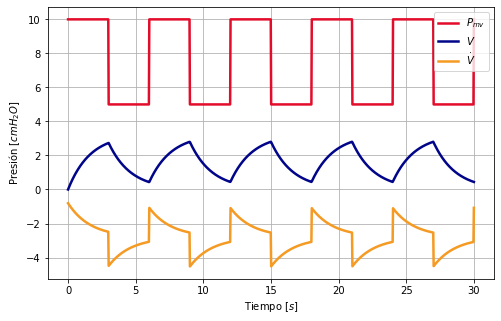

In [13]:
plt.figure(figsize=fig_size)
plt.plot(
    t_c, [p_mv_c(t_c[i]) for i in range(len(t_c))],
    label=r'$P_{mv}$',
    linewidth=grosor,
    color=rojo
)
plt.plot(
    t_c, v_sol_c,
    label=r'$V$',
    linewidth=grosor,
    color=azul
)
plt.plot(
    t_c, [v_dot_c(v_sol_c[i], t_c[i]) for i in range(len(t_c))] - max(v_sol_c),
    label=r'$\dot{V}$',
    linewidth=grosor,
    color=naranjo
)
plt.xlabel(r'Tiempo $[s]$')
plt.ylabel(r'Presión $[cmH_2O]$')
plt.legend()
plt.grid()
plt.show()